# **Word embedding with Python**
**word2vec, doc2vec, GloVe implementation with Python**

---
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7lrYJSLlPvn3Hoeo24Y2NAze3ZLMsRdxibZR1MsMCiHkwHXAS)
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/06062705/Word-Vectors.png)

---

### **Table of Contents**

---
* [**1.What are Word Embeddings?**](#1.What-are-Word-Embeddings?)
* [**2.Different types of Word Embedding**](#2.-Different-types-of-Word-Embedding)
    * [**2.1.Frequency based Embedding**](#2.1.Frequency-based-Embedding)  
        * [**2.1.1.Count Vectors**](#2.1.1.Count-Vectors)  
        * [**2.1.2.TF-IDF**](#2.1.2.TF-IDF)  
        * [**2.1.3.Co-Occurrence Matrix**](#2.1.3.Co-Occurrence-Matrix)  
    * [**2.2.Prediction based Embedding**](#2.2.Prediction-based-Embedding)  
        * [**2.2.1.CBOW**](#2.2.1.CBOW)  
        * [**2.2.2.Skip-Gram**](#2.2.2.Skip-Gram)  
* [**3.Using pre-trained Word Vectors**](#3.Using-pre-trained-Word-Vectors)
* [**4.Training your own Word Vectors**](#5.Training-your-own-Word-Vectors)

---

# ***1.What are Word Embeddings?***

---
# **Defination**

> ## **Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.** ***...By Jason Brownlee.***  
---
### **Example 1**
![](https://i.stack.imgur.com/oJEie.png)

### **Example 2**
![](https://cdn-images-1.medium.com/max/1600/1*YEJf9BQQh0ma1ECs6x_7yQ.png)

* A very basic definition of a word embedding is a real number, vector representation of a word. Typically, these days, words with similar meaning will have vector representations that are close together in the embedding space (though this hasn’t always been the case).

* ***Word embedding is a dense representation of words in the form of numeric vectors. It can be learned using a variety of language models. The word embedding representation is able to reveal many hidden relationships between words. For example, vector(“cat”) - vector(“kitten”) is similar to vector(“dog”) - vector(“puppy”). This post introduces several models for learning word embedding and how their loss functions are designed for the purpose.***



---

# ***2.Different types of Word Embedding***

---

### The different types of word embeddings can be broadly classified into two categories

1. **Frequency based Embedding**
1. **Prediction based Embedding**

![](https://multithreaded.stitchfix.com/assets/posts/2017-10-18-stop-using-word2vec/fig_006.png)

---
## ***2.1.Frequency based Embedding***

### **2.1.1.Count Vectors**

---

* Extract the corpus C {d1, d2 ... dD} of the document D and the N unique tokens (words) from the corpus C. N unque form our dictionary and the size of the count vector matrix M by DX N. D (i) is the number of times each row of the matrix contains M tokens in the document.

#### Let us understand this with a simple example.

* **D1: He is a lazy boy. She is also lazy.**
* **D2: Neeraj is a lazy person.**

The dictionary created can be a word with a **unique tag in the corpus**: ***['He', 'She', 'lazy', 'boy', 'Neeraj', 'person']***  
* Here, **D = 2, N = 6**, The count matrix M of size 2 X 6 will be represented as –

||He|She|lazy|boy|Neeraj|person|
|--|--|--|--|--|--|--|
|D1|1|1|2|1|0|0|
|D2|0|0|1|0|1|1|


### **Practical Example**

### **1. Count Vectorization**


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
text = ['The quick brown fox jumped over the lazy dog']

In [3]:
vectorizer = CountVectorizer()
vectorizer.fit(text)
print(vectorizer.vocabulary_)
#encode the document
vector = vectorizer.transform(text)
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [4]:
vector = vectorizer.transform(text)
print(vector.shape)
print(type(vector))
print(vector.toarray())

(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [5]:
vector.toarray()
df = pd.DataFrame(vector.todense())
df.describe()

,0,1,2,3,4,5,6,7
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0


## **2.1.2.TF-IDF**

---


![](https://lh4.googleusercontent.com/zSHLtG-IVPQG_raN67XTAuzIlKpJs8dkZtFP3VhN7W8Ur4keIzgRt8_w1eyqQ8lyX1flOqyf4xhrOoXUzLRHfzgCQhurjouJFyQaPMahHb8Ar5TH5L96T8QTQGKF7C90wvYhjvPOshzbyK4zSA)

### **Formula**
![](https://cdn-images-1.medium.com/max/1600/1*jNnpbGPxkjehlvTCXq9B8g.png)
1.  **TF Score (Term Frequency)** :
Considers documents as bag of words, agnostic to order of words. A document with 10 occurrences of the term is more relevant than a document with term frequency 1. But it is not 10 times more relevant, relevance is not proportional to frequency

2.  **IDF Score (Inverse Document Frequency)**
We also want to use the frequency of the term in the collection for weighting and ranking. Rare terms are more informative than frequent terms. We want low positive weights for frequent terms and high weights for rare terms.

### **Mathematical Example**

![image.png](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/04171138/Tf-IDF.png)

 
### ***Term Frequency***

---
TF(***Term Frequency***) = (**Number of times term t appears in a document)/(Number of terms in the document)**

* **TF(This,Document1)** = 1/8
* **TF(This, Document2)**=1/5

It **denotes the contribution of the word to the document i.e words relevant to the document should be frequent.** eg: **A document about Messi should contain the word ‘Messi’ in large number.**

### ***Inverse Document Frequency***

---
IDF(***Inverse Document Frequency***) = **log(N/n)**, where, **N is the number of documents and n is the number of documents a term t has appeared in.**

* where **N is the number of documents** and **n is the number of documents a term t has appeared in.**

* **IDF(This) = log(2/2) = 0.**

* So, how do we explain the reasoning behind IDF? Ideally, if a word has appeared in all the document, then probably that word is not relevant to a particular document. But if it has appeared in a subset of documents then probably the word is of some relevance to the documents it is present in.

Let us compute IDF for the word ‘Messi’.

* **IDF(Messi)** = log(2/1) = 0.301.

Now, let us compare the TF-IDF for a common word ‘This’ and a word ‘Messi’ which seems to be of relevance to Document 1.

* TF-IDF(This,Document1) = (1/8) * (0) = 0
* TF-IDF(This, Document2) = (1/5) * (0) = 0
* TF-IDF(Messi, Document1) = (4/8)*0.301 = 0.15

In [6]:
text_2 = ['The quick brown fox jumped over the lazy dog','The dog','The fox']

In [7]:
#create the transform
vectorizer_2 = TfidfVectorizer()
#tokenize and build vocab
vectorizer_2.fit(text_2)
# summarize
print(vectorizer_2.vocabulary_)
print(vectorizer_2.idf_)
#encode document
vector_2 = vectorizer_2.transform(text_2)
#summarize encode vector
print(vector_2.shape)
print(vector_2.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(3, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]
 [0.         0.78980693 0.         0.         0.         0.
  0.         0.61335554]
 [0.         0.         0.78980693 0.         0.         0.
  0.         0.61335554]]


In [8]:
vector_2.shape

(3, 8)

In [9]:
vector_2.toarray()
pd.DataFrame(vector_2.todense())

,0,1,2,3,4,5,6,7
0,0.363886,0.276745,0.276745,0.363886,0.363886,0.363886,0.363886,0.429834
1,0.000000,0.789807,0.000000,0.000000,0.000000,0.000000,0.000000,0.613356
2,0.000000,0.000000,0.789807,0.000000,0.000000,0.000000,0.000000,0.613356


In [10]:
df.info

<bound method DataFrame.info of    0  1  2  3  4  5  6  7
0  1  1  1  1  1  1  1  2>

In [11]:
# trying to get cosine similarity
cosine_similarity(vector,vector_2)

array([[0.9746629 , 0.60800305, 0.60800305]])

## **2.1.3.Co-Occurrence Matrix**

---

![](https://slideplayer.com/slide/9474494/29/images/12/Computation+of+Co-occurrence+Matrix.jpg)

**The big idea:** similar words tend to happen together and will have a similar context, for example, Apple is a fruit. Mango is a fruit.Apples and mangos tend to have a similar background, namely fruits. Before delving deeper into the details of **constructing a co-occurrence matrix,** two concepts need to be clarified: **co-occurrence and context limitations.**

* **Co-occurrence:** for a given corpus, **_the symbiosis of a pair of words w1 and w2 is the number of times they appear together within the context boundary._**
* **Context limits:** Context limits are specified by **_numbers and addresses. So, what does the context limit 2 (around) mean? Let's see an example._**
![](https://frproxy.vpnbook.com/browse.php?u=BZBC9ReUZHRUXH%2FpbtilyDmkvQv8Tx97on0Ltbk73UxyXedka8TMZfMr6kirZ3DKYs00fBVTNqjj1%2B90dw%3D%3D&b=0)

The **green word is the context boundary 2 (surrounding) of the word "Fox"** and only these words are calculated to calculate the co-occurrence. Let's look at the context limit of the word "Over".
![](https://frproxy.vpnbook.com/browse.php?u=BZBC9ReUZHRUXH%2FpbtilyDmkvQv8Tx97on0Ltbk73UxyXedka8TMZfNy%2B06mZXDKYs07fBUPNqjj1%2B90dw%3D%3D&b=0)

Let's take an example to calculate a **co-occurrence matrix.**
* **Corpus = He is not lazy. He is intelligent. He is intelligent.**

![](https://frproxy.vpnbook.com/browse.php?u=BZBC9ReUY3RUXH%2FpbtilyDmkvQv8Tx97on0Ltbk73UxyXedka8TMZfx5vErhK3DKYs08fBIYcre51%2B90dw%3D%3D&b=0)

Let us understand this co-occurrence matrix by using the two examples from the previous table. **Red and blue boxes.**

***Red box:*** The number of occurrences of **"He"** and **"East"** within context 2, you can see that this number is 4.

![](https://frproxy.vpnbook.com/browse.php?u=BZBC9ReUYnRUXH%2FpbtilyDmkvQv8Tx97on0Ltbk73UxyXedka8TMZfxluFCiJXDKYsIpfBFTJqCw1%2B90dw%3D%3D&b=0)

* The word **"Lazy"** has never been **"intelligent"** in the ***context of the boundary, so it has been assigned a value of 0 in the blue box.***

### **Change of co-occurrence matrix.**

* Suppose there are *V unique words in the corpus. Therefore, the size of the vocabulary = V.* The columns of the ***concurrency matrix form a context word. The varied changes in the co-occurrence matrix are:*
    1. ***V X V size co-occurrence matrix Now, a regular V body becomes very large, which will be difficult to handle.*** In general, this framework is not the first application in practice.
    2. A ***co-occurrence matrix of size V x N, where N is a subset of V and can be obtained***, for example, by removing irrelevant words, such as invalid words, which are still very large and present. Computational difficulties

However, keep in mind that this co-occurrence matrix is ​​not generally used for the vector representation of words, but is **divided into factors that use techniques such as PCA, SVD, etc. These factors form a representation of the word vector.**

***For example, perform a PCA in a full-size VXV array. You will get the main components of V. You can select k components of these V. V X components.***

In addition, **a word will be represented in k-dimensional form instead of v-dimensional while rigorously capturing identical semantic information. K is generally of the order of several hundred.**

Next, ***PCA will do this to divide the co-occurrence matrix into three matrices U, S, and V, where U and V are orthogonal matrices. What is important is that the scalar product of U and S gives a representation of the word vector, and V gives a representation of the word context.***

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/04224842/svd2.png)

**Advantages of Co-occurrence Matrix**:

* It preserves the semantic relationship between words. i.e man and woman tend to be closer than man and apple.
* It uses SVD at its core, which produces more accurate word vector representations than existing methods.
* It uses factorization which is a well-defined problem and can be efficiently solved.
* It has to be computed once and can be used anytime once computed. In this sense, it is faster in comparison to others.
 
**Disadvantages of Co-Occurrence Matrix**

* It requires huge memory to store the co-occurrence matrix.
* But, this problem can be circumvented by factorizing the matrix out of the system for example in Hadoop clusters etc. and can be saved.
 

### **Practical Example**

In [12]:
# libraries we'll need
# https://www.kaggle.com/rtatman/co-occurrence-matrix-plot-in-python
import pandas as pd # dataframes
from io import StringIO # string to data frame
import seaborn as sns # plotting

In [13]:
# read in our data & convert to a data frame
data_tsv = StringIO("""city    province    position
0   Massena     NY  jr
1   Maysville   KY  pm
2   Massena     NY  m
3   Athens      OH  jr
4   Hamilton    OH  sr
5   Englewood   OH  jr
6   Saluda      SC  sr
7   Batesburg   SC  pm
8   Paragould   AR  m""")

my_data_frame = pd.read_csv(data_tsv, delimiter=r"\s+")

In [14]:
my_data_frame

,city,province,position
0,Massena,NY,jr
1,Maysville,KY,pm
2,Massena,NY,m
3,Athens,OH,jr
4,Hamilton,OH,sr
5,Englewood,OH,jr
6,Saluda,SC,sr
7,Batesburg,SC,pm
8,Paragould,AR,m


In [15]:
# conver to co-occurance matrix
co_mat = pd.crosstab(my_data_frame.province, my_data_frame.position)
co_mat

position,jr,m,pm,sr
province,,,,
AR,0,1,0,0
KY,0,0,1,0
NY,1,1,0,0
OH,2,0,0,1
SC,0,0,1,1


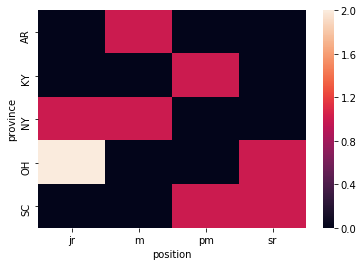

In [16]:
# plot heat map of co-occuance matrix
sns.heatmap(co_mat)

# *2.2.Prediction based Embedding*

---
* **Word2vec** is not a single algorithm, but a **combination of two technologies - CBOW (continuous word bag) and Skip-gram model.** Both of these are shallow neural networks, which also map words to a target variable. Both techniques learn the weights represented by word vectors. 

## **2.2.1.CBOW**
#### (Continuous Bag of words)

* **CBOW model and the skip-gram model are based on the Huffman tree. **

### **Huffman Tree**

* **Huffman Tree** is a ***lossless data encoding algorithm.*** *The process behind its scheme includes sorting numerical values from a set in order of their frequency. The **least frequent numbers are gradually eliminated via the Huffman tree**, which **adds the two lowest frequencies from the sorted list in every new “branch.”** The sum is then positioned above the **two eliminated lower frequency values, and replaces them in the new sorted list**. Each time a **new branch is created**, it moves the **general direction of the tree** either to **the right (for higher values) or the left (for lower values)** When the sorted list is exhausted and the tree is complete, ***the final value is zero if the tree ended on a left number, or it is one if it ended on the right.*** This is a method of reducing complex code into simpler sequences and is common in video encoding.

![](https://upload.wikimedia.org/wikipedia/commons/a/ac/Huffman_huff_demo.gif)

## ***CBOW Continues...***

![](https://cdn-images-1.medium.com/max/800/1*TkKW5uED9cm5xv-3JeSaEA.png)

## **Forward propagation**
* Next we look at CBOW neural network, the neural network model CBOW neural network model skip-gram is a mirror image of 

![](https://img-blog.csdn.net/20171205202107851?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvdTAxMDY2NTIxNg==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast)

* the figure above, the **input and output** of the input-output model **skip-gram model** is opposite to so,Here the input layer is the **input context encoded by one-hot ${x1,...,xC}$ composition**, where the window size is $C$ and the vocabulary size is $V$. The hidden layer is an N-dimensional vector. The final output layer is the output word that is also encoded by one-hot.$y$. Input vector encoded by one-hot through one $V×N$ Dimension weight matrix $W$ Connect to the hidden layer; hide the layer through one $N×V$ Weight matrix $W{'}$ Connect to the output layer. 

> The first step is to calculate the hidden layer.Output. as follows

$h = \frac{1}{C}W\cdot (\sum_{i=1}^C x_i)\tag{$1$}$

* This output is the **weighted average of the input vectors.** The hidden layer here is significantly different from the hidden layer of the ***skip-gram.***

* The second part is to calculate the ***input at each node of the output layer. as follows:***

$u_{j}=v^{'T}_{wj}\cdot h\tag{$2$}$

* among them $v^{'T}_{wj}$ Output matrix $W^{'}$

* Finally we calculate the **output of the output layer, the $y_j$ outputas follows:** 

$y_{c,j} =p(w_{y,j}|w_1,...,w_c) = \frac{exp(u_{j})}{\sum^V_{j^{'}=1}exp(u^{'}j)}\tag{$3$}$

## **Learn weights by BP (backpropagation) algorithm and stochastic gradient descent**
* Learning weight matrix $W$ versus$W^{'}$In the process, we can assign a **random value to these weights to initialize.** The samples are then **trained in order, and the error between the output and the true value is observed one by one, and the gradient of these errors is calculated.** And correct the **weight matrix** in the gradient direction. This method is called **random gradient descent.** But this derived method is called the back propagation error algorithm. 

The first is to define the loss function. This loss function is the ***conditional probability of the output word given the input context. It is usually a logarithm, as shown below:** 

$E = -logp(w_O|w_I)\tag{$4$}$

$= -v_{wo}^T\cdot h-log\sum_{j^{'}=1}^Vexp(v^T_w{_{j^{'}}}\cdot h)\tag{$5$}$

* The next step is to **derive the above probability.** The ***specific derivation process can look at the BP algorithm.*** We get the output weight matrix.$W{‘}$Update rules: 

$w^{'(new)} = w_{ij}^{'(old)}-\eta\cdot(y_{j}-t_{j})\cdot h_i\tag{$6$}$

* **Equal weight $W{'}$** The update rules are as follows: 
$w^{(new)} = w_{ij}^{(old)}-\eta\cdot\frac{1}{C}\cdot EH\tag{$7$}$

### **Psuedo Code**

![](https://img-blog.csdn.net/20160719183705872)

## **2.2.2.Skip-Gram**

---

* In many **natural language processing** tasks, many **word expressions** are determined by their **tf-idf** scores. Even though these **scores tell us the relative importance of a word** in a text, they do not tell us the **semantics of the word. Word2vec is a type of neural network model** that, in the case of an **unlabeled corpus, produces a vector that expresses semantics for words in the corpus.** These vectors are usually useful:

> * Calculating the semantic similarity of two words by word vector
> * Semantic analysis of some supervised NLP tasks such as text categorization

* Before go into detail about the **skip-gram model,** let's first understand the format of the **training data.** The input to the **skip-gram model** is a word $w_I$ output is $w_I$  Context ${w_{O,1},...,w_{O,C}}$ the context window size is CC. For example, here is a sentence "I drive my car to the store." If we use "car" as the training input data, the word group {"I", "drive", "my", "to", "the", "store"} is the output. For all these words, we will do one-hot coding. The skip-gram model diagram is as follows:

![](http://06.imgmini.eastday.com/mobile/20180812/20180812154801_6ec928d180bf51a8d8de0b5c10d8f3f9_2.jpeg)

### **Forward propagation**
* Next, we look at the skip-gram neural network model. The neural network model of **skip-gram** is improved from the **feedforward neural network** model. It is said that the model is **more effective through some techniques based on the feedforward neural network model.** Let's take a look at the image of a **wave-gram neural network model:** 

![](http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/10_Keras_Word2Vec/fig-word2vec-sg.png)


* In the above figure, the input **vector $x$ One-hot encoding representing a word,** corresponding ***output vector ${ y1y1,..., yCyC}.$ Weight matrix between input layer and hidden layer $W$The iiRow represents the i in the vocabulary $i$ The weight of the words.*** The next point is : this weight matrix $W's$ the **goal we need to learn (same as $W{‘}$), because this weight matrix contains weight information for all words in the vocabulary.** In the above model, each output **word vector also has a $N× V$ Dimension output vector $W‘$. The final model also has NNThe hidden layer of the node, we can find the hidden layer node hihiThe input is the weighted sum of the input layer inputs. So because of the input vector $x$ one-hot encoding, then only non-zero elements in the vector can produce input to the hidden layer.** So for the input vector **$x$ Where $x_{k^{'}}=0, k\ne k^{'}$And $xk‘= 0 , k ≠ k‘xk‘=0,k≠k‘$.** So the output of the hidden layer is only with the weight matrix $k$ Row related, mathematically proved as follows: 

$ h = x^TW=W_{k,.}:=v_{wI}\tag{$1$} $

* Note that since the input is ***one-hot encoded, there is no need to use the activation function here.*** Similarly, **the model output node $C× V$.** The **input** is also **calculated from the weighted sum of the corresponding input nodes:*** 

$ u_{c,j}=v^{'T}_{wj}h\tag{$2$} $

* In fact, we also saw from the above figure that ***each word in the output layer is shared weight, so we have $u_{c,j}=u_j$*** Finally, we ***generate the C through the softmax function.CThe polynomial distribution of words.*** 

$ p(w_{c,j}=w_{O,c}|w_{I}) = y_{c,j} = \frac{exp(u_{c,j})}{\sum^V_{j^{'}=1}exp(u_{}j^{'})}\tag{$3$} $

* To put it bluntly, this value is the ***probability of the jth node of the $C$ th output word.***

## **Learn weights by BP (backpropagation) algorithm and stochastic gradient descent**

* the input vector of the ***skip-gram model** and ***the probabilistic expression of the output***, as well as the goals we learned. Next, we explain in detail the ***process of learning weights. The first step is to define the loss function. This loss function is the conditional probability of the output word group. It is usually a logarithm, as shown below:***

$E = -logp(w_{O,1},w_{O,2},...,w_{O,C}|w_I)\tag{$4$}$

$= -log\prod_{c=1}^{C}\frac{exp(u_{c,j})}{\sum^V_{j^{'}=1exp(u_j^{'})}}\tag{$5$}$

* The next step is to ***derive the above probability.*** The **specific derivation process** can look at the **BP algorithm**. We get the output **weight matrix.$W‘$Update rules:** 

$ w^{'(new)} = w_{ij}^{'(old)}-\eta\cdot\sum^{C}_{c=1}(y_{c,j}-t_{c,j})\cdot h_i\tag{$6$} $

* From the above update rules, we can find that each update requires **summing the entire vocabulary, so for a large corpus, this computational complexity is very high.** So in practical applications, [**Google's Mikolov**](https://arxiv.org/pdf/1310.4546.pdf) et al. proposed that layered softmax and negative sampling can make the computational complexity much lower.


In [17]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec

In [18]:
#  Reads ‘alice.txt’ file 
sample = open("../input/text-data/alice.txt", "r") 
s = sample.read() 

In [19]:
# Replaces escape character with space 
f = s.replace("\n", " ") 

In [20]:
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
        
    data.append(temp) 

## **CBOW Model**
---

In [21]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5) 

In [22]:
# Print results 
print("Cosine similarity between 'alice' " + "and 'wonderland' - CBOW : ", model1.similarity('alice', 'wonderland')) 
print("Cosine similarity between 'alice' " +"and 'machines' - CBOW : ", model1.similarity('alice', 'machines')) 

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.998599
Cosine similarity between 'alice' and 'machines' - CBOW :  0.979704


## **SKIP-GRAM Model**
---

In [23]:
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)

In [24]:
# Print results 
print("Cosine similarity between 'alice' " + "and 'wonderland' - Skip Gram : ", model2.similarity('alice', 'wonderland')) 
print("Cosine similarity between 'alice' " + "and 'machines' - Skip Gram : ", model2.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.94563484
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.9324432


## **3.Using pre-trained word vectors**

---

## **1.Glove**
- **Official Page : https://nlp.stanford.edu/projects/glove/  (Reading More About Glove)**
- **Original Paper: https://nlp.stanford.edu/pubs/glove.pdf**
 
### **Installation of Glove-python**


In [25]:
# https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285
!pip install glove_python

    100% |████████████████████████████████| 266kB 8.9MB/s 
  Running setup.py bdist_wheel for glove-python ... - \ | / - \ | / - \ | done
  Stored in directory: /tmp/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
import re
import numpy as np

from glove import Corpus, Glove
from nltk.corpus import gutenberg
from multiprocessing import Pool
from scipy import spatial

## **Import training dataset**
* Import Shakespeare's Hamlet corpus from nltk library

In [27]:
sentences = list(gutenberg.sents('shakespeare-hamlet.txt')) 

In [28]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']
['Actus', 'Primus', '.']
['Fran', '.']


## **Preprocess data**
* Use re module to preprocess data
* Convert all letters into lowercase
* Remove punctuations, numbers, etc.

In [29]:
for i in range(len(sentences)):
    sentences[i] = [word.lower() for word in sentences[i] if re.match('^[a-zA-Z]+', word)]

In [30]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare']
['actus', 'primus']
['fran']


## **Create Corpus instance**
* Sentences should be fitted into the Corpus instance
* Recall that GloVe takes advantage of both count-based matrix factorization and local context-based window methods

In [31]:
corpus = Corpus()

In [32]:
corpus.fit(sentences, window = 3)    # window parameter denotes the distance of context

In [33]:
glove = Glove(no_components = 100, learning_rate = 0.05)

## **Train model**
* GloVe model is trained with corpus matrix (global statistics of words)
* Key parameter description
    * **matrix**: co-occurence matrix of the corpus
    * **epochs**: number of epochs (i.e., training iterations)
    * **no_threads**: number of training threads
    * **verbose**: whether to print out the progress messages

In [34]:
glove.fit(matrix = corpus.matrix, epochs = 40, no_threads = Pool()._processes, verbose = False)
glove.add_dictionary(corpus.dictionary)    #  supply a word-id dictionary to allow similarity queries

## **Save and load model**
* word2vec model can be saved and loaded locally
* Doing so can reduce time to train model again

In [35]:
glove.save('glove_model')
glove.load('glove_model')

## **Similarity calculation**
* Similarity between embedded words (i.e., vectors) can be computed using metrics such as cosine similarity
* For other metrics and comparisons between them, refer to: https://github.com/taki0112/Vector_Similarity

In [36]:
glove.most_similar('king', number = 10)

[('queene', 0.9944288763649561),
 ('matter', 0.9923416888286443),
 ('rest', 0.9905364974830612),
 ('against', 0.9881272843339302),
 ('players', 0.9877037264232148),
 ('winde', 0.9854944445347792),
 ('first', 0.9794307052998981),
 ('drinke', 0.9774403916734686),
 ('world', 0.9760692025030918)]

In [37]:
# define a function that converts word into embedded vector
def vector_converter(word):
    idx = glove.dictionary[word]
    return glove.word_vectors[idx]


# define a function that computes cosine similarity between two words
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)


v1 = vector_converter('king')
v2 = vector_converter('queen')

In [38]:
cosine_similarity(v1, v2)

0.5253676095555772

---

## **2.Sentence modeling**

---

Reference Paper : https://arxiv.org/abs/1704.05358
* One of the methods to represent sentences as vectors (Mu et al 2017)
* Computing vector representations of each embedded word, and weight average them using PCA
* If there are n words in a sentence, select N words with high explained variance (n>N)
* Most of "energy" (around 80%) can be containted using only 4 words (N=4) in the original paper (Mu et al 2017)

In [39]:
import re
import numpy as np

from gensim.models import Word2Vec
from nltk.corpus import gutenberg
from multiprocessing import Pool
from scipy import spatial
from sklearn.decomposition import PCA

In [40]:
sentences = list(gutenberg.sents('shakespeare-hamlet.txt'))   # import the corpus and convert into a list

In [41]:
print('Type of corpus: ', type(sentences))
print('Length of corpus: ', len(sentences))

Type of corpus:  <class 'list'>
Length of corpus:  3106


In [42]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']
['Actus', 'Primus', '.']
['Fran', '.']


In [43]:
for i in range(len(sentences)):
    sentences[i] = [word.lower() for word in sentences[i] if re.match('^[a-zA-Z]+', word)]

In [44]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare']
['actus', 'primus']
['fran']


In [45]:
# set threshold to consider only sentences longer than certain integer
threshold = 5

for i in range(len(sentences)):
    if len(sentences[i]) < 5:
        sentences[i] = None

In [46]:
sentences = [sentence for sentence in sentences if sentence is not None]
print('Length of corpus: ', len(sentences))

Length of corpus:  1442


In [47]:
model = Word2Vec(sentences = sentences, size = 100, sg = 1, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)
model.init_sims(replace = True)

In [48]:
# converting each word into its vector representation
for i in range(len(sentences)):
    sentences[i] = [model[word] for word in sentences[i]]
    
print(sentences[0])    # vector representation of first sentence

[array([ 0.08335786, -0.07213513, -0.20063809,  0.05081655,  0.09836033,
        0.15220012, -0.05886959, -0.01153508,  0.09016863,  0.01645453,
        0.12024643,  0.05838461, -0.13654494, -0.10049982, -0.1354872 ,
        0.15461814,  0.20663305,  0.15638334, -0.04274949, -0.0652777 ,
       -0.02395124,  0.11025704,  0.04690168,  0.08275189, -0.03971412,
        0.22879153,  0.15806663,  0.01348209,  0.04859876, -0.12926978,
        0.0583923 ,  0.00779952,  0.03206569,  0.00270079, -0.01983257,
       -0.05165885,  0.02987897,  0.02768921,  0.18233198, -0.06439023,
        0.00360876,  0.08085674,  0.13507879,  0.1953338 ,  0.06515917,
        0.13446087,  0.06147116, -0.15422224,  0.07960836, -0.00654449,
       -0.17003214,  0.13114767, -0.03374168, -0.04970448, -0.05062852,
        0.19883926, -0.03758239, -0.02747432,  0.02194867,  0.05582333,
        0.0244682 ,  0.04731939,  0.04571397, -0.05661085,  0.03334177,
       -0.09297622,  0.00407487,  0.08623616, -0.0033942 , -0.1

In [49]:
# define function to compute weighted vector representation of sentence
# parameter 'n' means number of words to be accounted when computing weighted average
def sent_PCA(sentence, n = 2):
    pca = PCA(n_components = n)
    pca.fit(np.array(sentence).transpose())
    variance = np.array(pca.explained_variance_ratio_)
    words = []
    for _ in range(n):
        idx = np.argmax(variance)
        words.append(np.amax(variance) * sentence[idx])
        variance[idx] = 0
    return np.sum(words, axis = 0)

In [50]:
sent_vectorized = []

# computing vector representation of each sentence
for sentence in sentences:
    sent_vectorized.append(sent_PCA(sentence))

In [51]:
# vector representation of first sentence
list(sent_PCA(sentences[0])) == list(sent_vectorized[0])

True

In [52]:
# define a function that computes cosine similarity between two words
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [53]:
# similarity between 11th and 101th sentence in the corpus
print(cosine_similarity(sent_vectorized[10], sent_vectorized[100]))

0.9896057844161987


---

## **3.Doc2Vec**

---

- Python implementation and application of doc2vec with Gensim
- Original paper: Le, Q., & Mikolov, T. (2014). Distributed representations of sentences and documents. In Proceedings of the 31st International Conference on Machine Learning (ICML-14) (pp. 1188-1196).

In [54]:
import re
import numpy as np

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.corpus import gutenberg
from multiprocessing import Pool
from scipy import spatial

## **Import training dataset**
* Import Shakespeare's Hamlet corpus from nltk library

In [55]:
sentences = list(gutenberg.sents('shakespeare-hamlet.txt'))   # import the corpus and convert into a list

In [56]:
print('Type of corpus: ', type(sentences))
print('Length of corpus: ', len(sentences))

Type of corpus:  <class 'list'>
Length of corpus:  3106


In [57]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']
['Actus', 'Primus', '.']
['Fran', '.']


## **Preprocess data**
* Use re module to preprocess data
* Convert all letters into lowercase
* Remove punctuations, numbers, etc.
* For the doc2vec model, input data should be in format of iterable **TaggedDocuments**"
    * Each TaggedDocument instance comprises **words** and **tags**
    * Hence, each document (i.e., a sentence or paragraph) should have a unique tag which is **identifiable**

In [58]:
for i in range(len(sentences)):
    sentences[i] = [word.lower() for word in sentences[i] if re.match('^[a-zA-Z]+', word)]
    
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

for i in range(len(sentences)):
    sentences[i] = TaggedDocument(words = sentences[i], tags = ['sent{}'.format(i)])    # converting each sentence into a TaggedDocument

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare']
['actus', 'primus']
['fran']


In [59]:
sentences[0]

TaggedDocument(words=['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare'], tags=['sent0'])

## **Create and train model**
* Create a doc2vec model and train it with Hamlet corpus
* Key parameter description (https://radimrehurek.com/gensim/models/doc2vec.html)
* **documents**: training data (has to be iterable TaggedDocument instances)
    * **size**: dimension of embedding space
    * **dm**: DBOW if 0, distributed-memory if 1
    * **window**: number of words accounted for each context (if the window size is 3, 3 word in the left neighorhood and 3 word in the right neighborhood are considered)
    * **min_count**: minimum count of words to be included in the vocabulary
    * **iter**: number of training iterations
    * **workers**: number of worker threads to train

In [60]:
model = Doc2Vec(documents = sentences, dm = 1, size = 100, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)
model.init_sims(replace = True)

## **Save and load model**
* doc2vec model can be saved and loaded locally
* Doing so can reduce time to train model again

In [61]:
model.save('doc2vec_model')
model = Doc2Vec.load('doc2vec_model')

## **Similarity calculation**
* Similarity between embedded words (i.e., vectors) can be computed using metrics such as cosine similarity
* For other metrics and comparisons between them, refer to: https://github.com/taki0112/Vector_Similarity

In [62]:
v1 = model.infer_vector('sent2')    # in doc2vec, infer_vector() function is used to infer the vector embedding of a document
v2 = model.infer_vector('sent3')

In [63]:
model.most_similar([v1])
# define a function that computes cosine similarity between two words
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [64]:
cosine_similarity(v1, v2)

0.9764359593391418

---

## **4.Word2Vec**

---

- Python implementation and application of word2vec with Gensim
- Original paper: [Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. arXiv preprint arXiv:1301.3781.](https://arxiv.org/pdf/1301.3781)

In [65]:
import re
import numpy as np

from gensim.models import Word2Vec
from nltk.corpus import gutenberg
from multiprocessing import Pool
from scipy import spatial

## **Import training dataset**
- Import Shakespeare's Hamlet corpus from nltk library

In [66]:
sentences = list(gutenberg.sents('shakespeare-hamlet.txt'))   # import the corpus and convert into a list

In [67]:
print('Type of corpus: ', type(sentences))
print('Length of corpus: ', len(sentences))

Type of corpus:  <class 'list'>
Length of corpus:  3106


In [68]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']
['Actus', 'Primus', '.']
['Fran', '.']


## **Preprocess data**
* Use re module to preprocess data
* Convert all letters into lowercase
* Remove punctuations, numbers, etc.

In [69]:
for i in range(len(sentences)):
    sentences[i] = [word.lower() for word in sentences[i] if re.match('^[a-zA-Z]+', word)]

In [70]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare']
['actus', 'primus']
['fran']


## **Create and train model**


* Create a word2vec model and train it with Hamlet corpus
* Key parameter description (https://radimrehurek.com/gensim/models/word2vec.html)
    * sentences: training data (has to be a list with tokenized sentences)
    * size: dimension of embedding space
    * sg: CBOW if 0, skip-gram if 1
    * window: number of words accounted for each context (if the window size is 3, 3 word in the left neighorhood and 3 word in the right neighborhood are considered)
    * min_count: minimum count of words to be included in the vocabulary
    * iter: number of training iterations
    * workers: number of worker threads to train

In [71]:
model = Word2Vec(sentences = sentences, size = 100, sg = 1, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)
model.init_sims(replace = True)

## **Save and load model**
* word2vec model can be saved and loaded locally
* Doing so can reduce time to train model again

In [72]:
model.save('word2vec_model')
model = Word2Vec.load('word2vec_model')

## **Similarity calculation**
* Similarity between embedded words (i.e., vectors) can be computed using metrics such as cosine similarity
* For other metrics and comparisons between them, refer to: https://github.com/taki0112/Vector_Similarity

In [73]:
model.most_similar('hamlet')

[('horatio', 0.9979696869850159),
 ('king', 0.9978400468826294),
 ('laertes', 0.997680127620697),
 ('queene', 0.9975776076316833),
 ('ophelia', 0.9974517822265625),
 ('ghost', 0.9973344802856445),
 ('deere', 0.9972615838050842),
 ('marcellus', 0.9971654415130615),
 ('noble', 0.9971342086791992),
 ('oh', 0.9969217777252197)]

In [74]:
v1 = model['king']
v2 = model['queen']

In [75]:
# define a function that computes cosine similarity between two words
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [76]:
cosine_similarity(v1, v2)

0.9965649247169495

## **4.Training your own Word Vectors**

---

* Word2Vec requires that a format of list of list for **training where every document is contained in a list and every list contains list of tokens** of that documents. I won’t be covering the ***pre-preprocessing part here. So let’s take an example list of list to train our word2vec model.**

## **Pretrained Google News Vector Model**

----

In [77]:
from gensim.models import Word2Vec, KeyedVectors

#loading the downloaded model
model = KeyedVectors.load_word2vec_format('../input/word2vec-google/GoogleNews-vectors-negative300.bin', binary=True)

In [78]:
#the model is loaded. It can be used to perform all of the tasks mentioned above.

# getting word vectors of a word
dog = model['dog']

#performing king queen magic
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

#picking odd one out
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

#printing similarity index
print(model.similarity('woman', 'man'))

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]
cereal
0.76640123


## **Own Word2Vector Model**

----

In [79]:
sentence=[['Neeraj','Boy'],['Sarwan','is'],['good','boy']]

In [80]:
#training word2vec on 3 sentences
model = gensim.models.Word2Vec(sentence, min_count=1,size=300,workers=4)

***Let us try to understand the parameters of this model.***

* **sentence** – list of list of our corpus
* **min_count**=1 -the threshold value for the words. Word with frequency greater than this only are going to be included into the model.
* **size**=300 – the number of dimensions in which we wish to represent our word. This is the size of the word vector.
* **workers**=4 – used for parallelization

In [81]:
#using the model
#The new trained model can be used similar to the pre-trained ones.

#printing similarity index
print(model.similarity('Boy', 'Neeraj'))

0.072585374


### References : 
1. https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
2. https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
3. https://www.quora.com/What-is-word-embedding-in-deep-learning
4. https://nlp.stanford.edu/projects/glove/

# ***Thanks for Reading***